Data source: 
>Huseyin Kusetogullari, Amir Yavariabdi, Johan Hall, Niklas Lavesson,
DIGITNET: A Deep Handwritten Digit Detection and Recognition Method Using a New Historical Handwritten Digit Dataset,
Big Data Research,
Volume 23,
2021,
100182,
ISSN 2214-5796,
https://doi.org/10.1016/j.bdr.2020.100182.
(https://www.sciencedirect.com/science/article/pii/S2214579620300502)

> @article{KUSETOGULLARI2021100182,
title = {DIGITNET: A Deep Handwritten Digit Detection and Recognition Method Using a New Historical Handwritten Digit Dataset},
journal = {Big Data Research},
volume = {23},
pages = {100182},
year = {2021},
issn = {2214-5796},
doi = {https://doi.org/10.1016/j.bdr.2020.100182},
url = {https://www.sciencedirect.com/science/article/pii/S2214579620300502},
author = {Huseyin Kusetogullari and Amir Yavariabdi and Johan Hall and Niklas Lavesson},
}

In [1]:
import utils
#utils.get_dhnb_images()

In [2]:
import numpy as np
from skimage.io import imread
from skimage.transform import resize
from skimage.color import rgb2gray
from skimage.filters import threshold_otsu
from skimage.feature import hog
from pathlib import Path
import matplotlib.pyplot as plt

In [19]:
images, labels = utils.read_all_images(max_images_per_digit=10)

Loaded 100 images from: dida_single_digit_10k


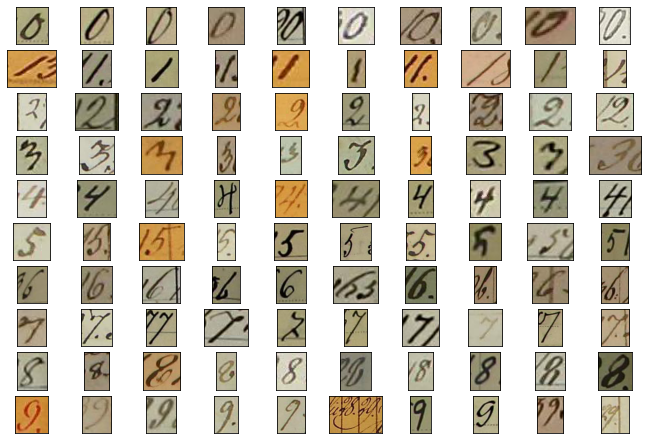

In [33]:
rows = 10
cols = len(images) // rows

fig, axs = plt.subplots(rows, cols, figsize=(9,6), constrained_layout=True)
index = 0
for row in range(rows):
    for col in range(cols): 
        ax = axs[row, col]
        ax.imshow(images[index])
        index += 1
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

In [28]:
preprocessed = []
for image in images:
    resized = resize(image, (28,28))
    greyscale = rgb2gray(resized)
    #thresholded = (greyscale<threshold_otsu(greyscale)).astype(np.uint8)
    preprocessed.append(greyscale)

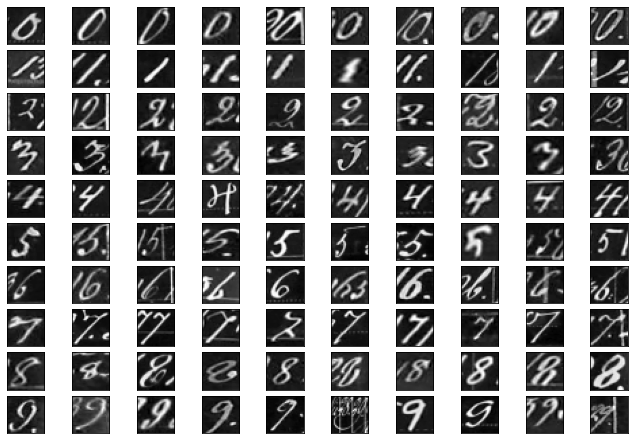

In [34]:
rows = 10
cols = len(images) // rows

fig, axs = plt.subplots(rows, cols, figsize=(9,6), constrained_layout=True)
index = 0
for row in range(rows):
    for col in range(cols): 
        ax = axs[row, col]
        ax.imshow(preprocessed[index], cmap="gray_r")
        index += 1
        plt.setp(ax.get_xticklabels(), visible=False)
        plt.setp(ax.get_yticklabels(), visible=False)
        ax.tick_params(axis='both', which='both', length=0)

In [29]:
# feature extraction
features = []
for image in preprocessed:
    features.append(hog(image))

In [8]:
# clustering ... 

In [14]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

In [30]:
reduced_data = PCA(n_components=2).fit_transform(features)
kmeans = KMeans(n_clusters=10, random_state=0).fit(reduced_data)

In [31]:
kmeans.labels_

array([8, 7, 7, 0, 7, 2, 7, 1, 1, 7, 6, 7, 6, 7, 9, 8, 9, 6, 7, 8, 4, 2,
       4, 8, 8, 4, 5, 2, 4, 8, 4, 4, 5, 4, 5, 8, 4, 4, 4, 2, 2, 1, 6, 0,
       1, 2, 0, 0, 4, 2, 5, 1, 3, 5, 3, 3, 0, 5, 2, 5, 3, 3, 9, 1, 3, 7,
       9, 9, 3, 9, 0, 7, 1, 2, 0, 9, 2, 8, 9, 1, 5, 4, 1, 4, 0, 1, 0, 0,
       7, 1, 4, 0, 1, 8, 8, 5, 5, 8, 1, 3], dtype=int32)

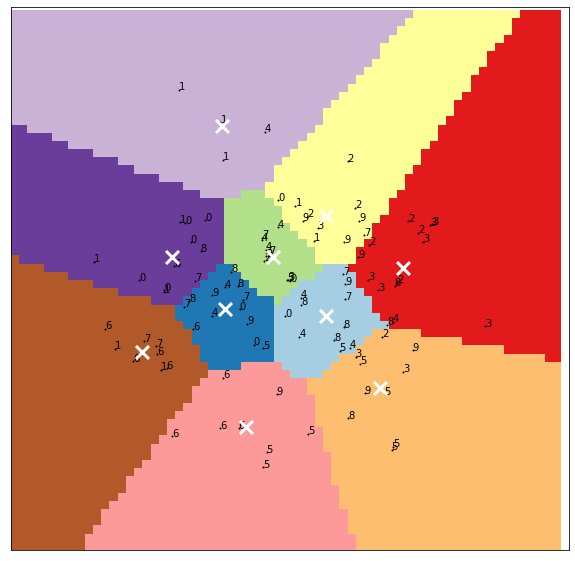

In [32]:
# TODO: Demo code from sklearn - will be adapted/replaced! 

h = 0.02  # point in the mesh [x_min, x_max]x[y_min, y_max].
padding = 0.2

# Plot the decision boundary. For that, we will assign a color to each
x_min, x_max = reduced_data[:, 0].min() - padding, reduced_data[:, 0].max() + padding
y_min, y_max = reduced_data[:, 1].min() - padding, reduced_data[:, 1].max() + padding
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

# Obtain labels for each point in mesh. Use last trained model.
Z = kmeans.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.figure(1, figsize=(10,10))
plt.clf()
plt.imshow(
    Z,
    interpolation="nearest",
    extent=(xx.min(), xx.max(), yy.min(), yy.max()),
    cmap=plt.cm.Paired,
    aspect="auto",
    origin="lower",
)

plt.plot(reduced_data[:, 0], reduced_data[:, 1], "k.", markersize=2)

for x, y, text in zip(reduced_data[:, 0], reduced_data[:, 1], labels):
    plt.text(x, y, text)

# Plot the centroids as a white X
centroids = kmeans.cluster_centers_
plt.scatter(
    centroids[:, 0],
    centroids[:, 1],
    marker="x",
    s=169,
    linewidths=3,
    color="w",
    zorder=10,
)
#plt.title("K-means clustering on the digits dataset (PCA-reduced data)\n Centroids are marked with white cross")
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)
plt.xticks(())
plt.yticks(())
plt.show()